In [60]:
import osmnx as ox

`Braga_raw` is only extracting the OSM graph within the limit specified by the polygon of the city

In [61]:
G = ox.load_graphml("../data/processed/braga_private/Braga_raw.graphml")
print(len(G), len(G.edges))

5470 12871


`Braga_wode` is `Braga_raw`, removing dead ends

In [62]:
G = ox.load_graphml("../data/processed/braga_private/Braga_wode.graphml")
print(len(G), len(G.edges))

3574 9265


`Braga_simplified` is a topologically simplified version, done manually in QGIS

In [63]:
G = ox.load_graphml("../data/processed/braga_private/Braga_simplified.graphml")
print(len(G), len(G.edges))

798 2469


In [2]:
import pandas as pd

In [8]:
df = pd.read_json("../data/processed/city_partners_public/metadata_cities.json")

In [9]:
df

,Cities,Area,Number of edges,Total road length,Road density,Total estimated population,Population density
0,Amsterdam,197.310440,29351,2731.368216,13.842999,1.098176e+06,5565.726372
1,Southwark,29.935407,9645,745.188713,24.893222,6.445944e+05,21532.843692
2,Vilnius,393.538646,18242,3410.464678,8.666149,9.630135e+05,2447.062197
3,Milan_Municipality,181.755362,25283,2485.476406,13.674845,1.727048e+06,9502.049596
4,Vratsa,15.643470,2592,261.162191,16.694646,4.604951e+04,2943.688785
5,Braga,55.123125,9728,939.062361,17.035724,1.944123e+05,3526.873445
6,Westminster,22.048690,7413,561.331434,25.458720,4.623552e+05,20969.733342
7,Riga,304.120728,23391,2943.355141,9.678246,9.970690e+05,3278.530079
8,Kozani,4.664904,3735,198.436143,42.538098,4.302471e+04,9223.065522
9,Zaragoza,46.546535,8922,769.462879,16.531045,6.305736e+05,13547.165110


In [10]:
import seaborn as sns

In [60]:
df_mod = df.copy()
for name in [
    "Area",
    "Number of edges",
    "Total road length",
    "Road density",
    "Total estimated population",
    "Population density",
]:
    df_mod[name] = (df_mod[name] - df_mod[name].mean()) / df_mod[name].std()

<Axes: xlabel='Road density', ylabel='Population density'>

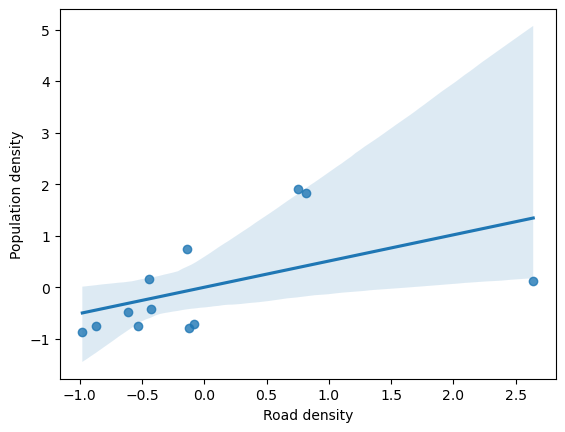

In [61]:
sns.regplot(df_mod, x="Road density", y="Population density", n_boot=1000)

In [38]:
import scipy

In [54]:
df_cut = df[df["Road density"] < 40]

In [70]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    df_cut["Area"], df_cut["Population density"]
)

In [71]:
slope

np.float64(-22.870447545033617)

In [72]:
r_value

np.float64(-0.4149370349625782)

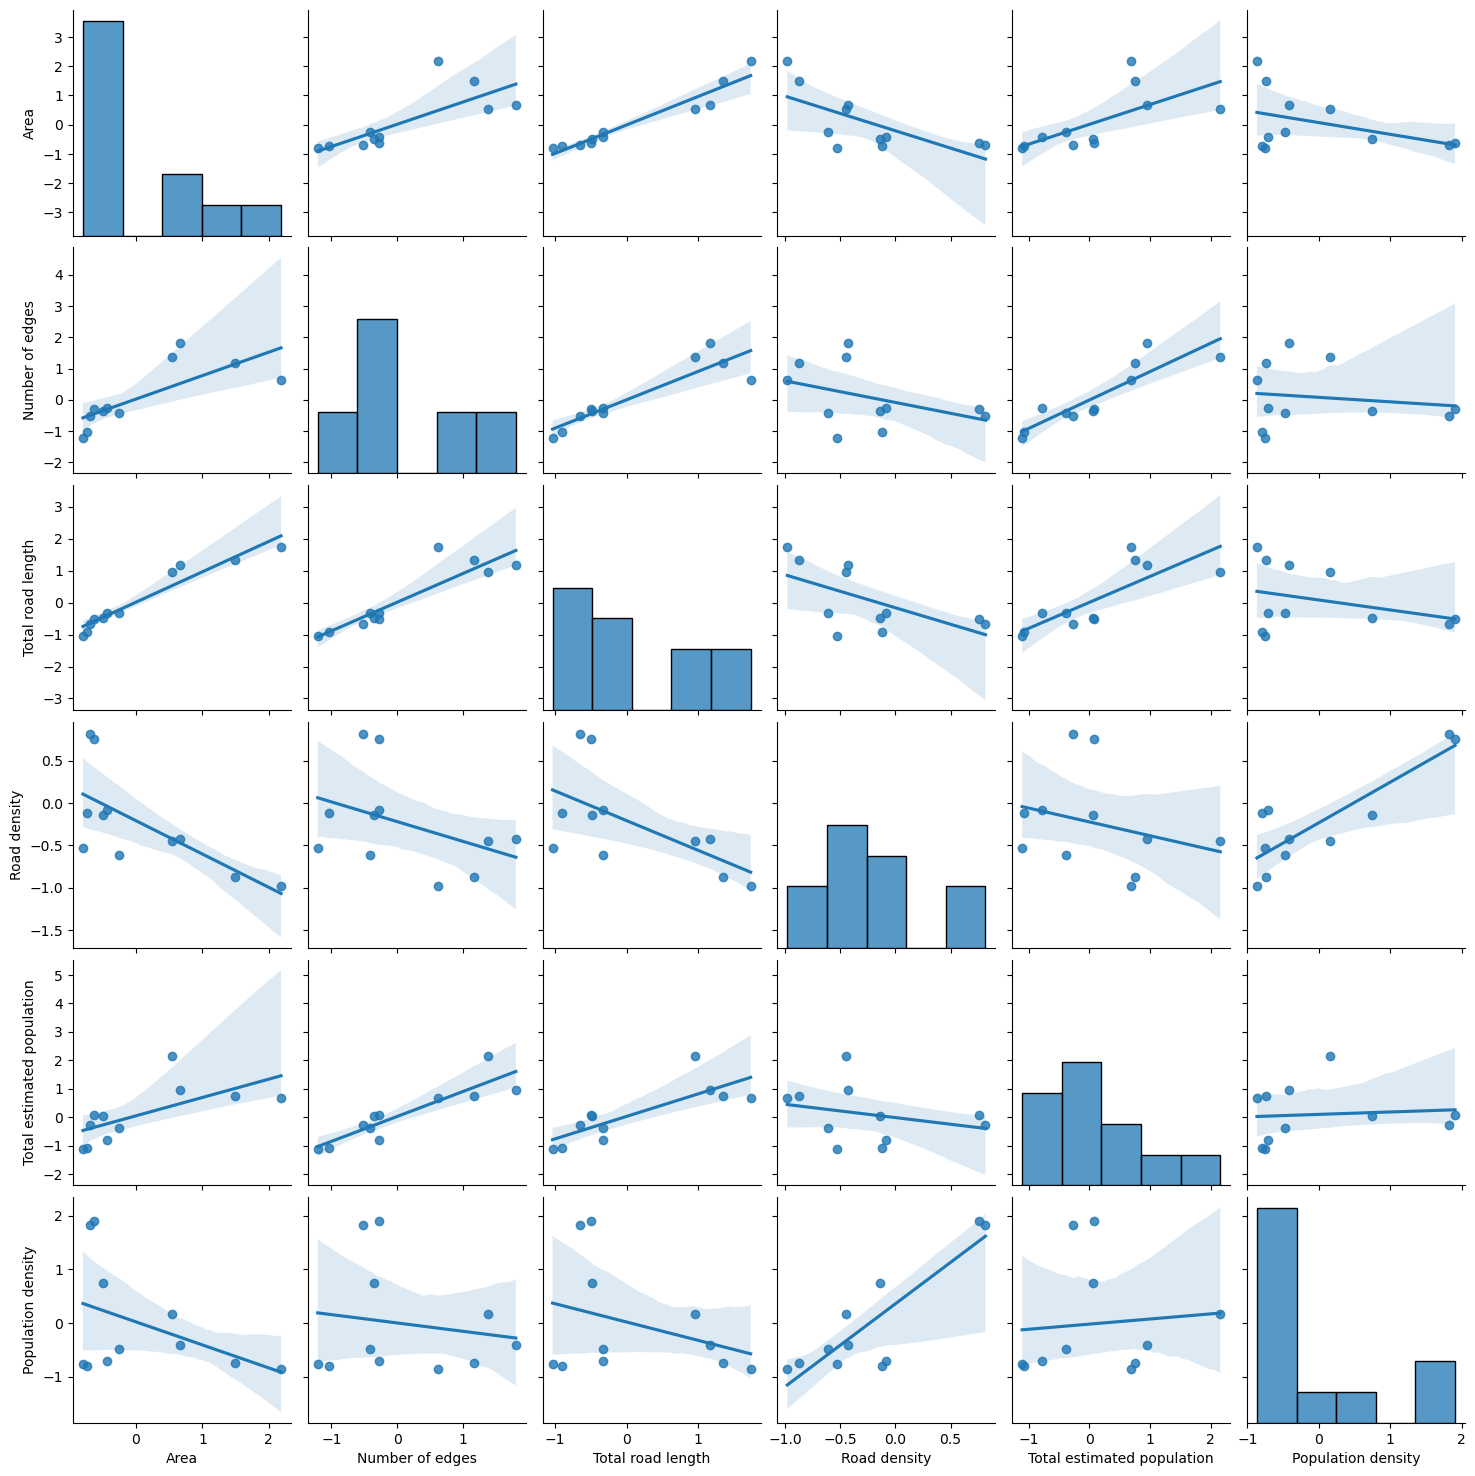

In [63]:
sns.pairplot(df_mod[df_mod["Road density"] < 2], kind="reg", diag_kind="hist");